In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('Data/homeprices_banglore.csv')
df.tail(),df.iloc[10]

(    area  bedrooms  price
 15  1175         2   42.0
 16  1180         3   48.0
 17  1540         3   60.0
 18  2770         3  102.0
 19   800         1   32.0,
 area        1800.0
 bedrooms       3.0
 price         82.0
 Name: 10, dtype: float64)

In [35]:
def minmaxscaler(df):
    return (df-min(df))/(max(df)-min(df))

In [41]:
df['area'] = minmaxscaler(df['area'])
df['bedrooms'] = minmaxscaler(df['bedrooms'])
df['price'] = minmaxscaler(df['price'])
df.head()

,area,bedrooms,price
0,0.088276,0.25,0.052370
1,0.620690,0.75,0.651852
2,0.220690,0.50,0.222222
3,0.248621,0.50,0.318519
4,0.137931,0.25,0.140741


In [44]:
from sklearn.model_selection import train_test_split
X=df.drop('price',axis='columns')
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
def sigmoid(y):
    return 1/1+np.exp(-y)

def gradient_descent(X,y_true,epochs):
    w1=w2=1
    bias=0
    rate=0.5
    area = X_train['area']
    bedrooms = X_train['bedrooms']
    n = len(area)
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        weighted_sum = area*w1+bedrooms*w2+bias
        y_pred = sigmoid(weighted_sum)
        w1d =-2/n*np.mean(np.dot(area,(y_true-y_pred)))
        w1 = w1-rate*w1d
        w2d =-2/n*np.mean(np.dot(bedrooms,(y_true-y_pred)))
        w2 = w2-rate*w2d
        bd=-2/n*np.mean((y_true-y_pred))
        bias = bias-rate*bd
        cost = np.mean((y_true - y_pred)**2)
        if i % 10 == 0:
            print(i, y_pred)
            cost_list.append(cost)
            epoch_list.append(i)
    return w1,w2,bias,cost,cost_list,epoch_list
    

In [56]:
X_train['area']

3     0.248621
18    0.679310
16    0.131034
13    0.103448
2     0.220690
9     1.000000
19    0.000000
4     0.137931
12    0.068966
7     0.862069
10    0.344828
14    0.500000
6     0.666207
Name: area, dtype: float64

In [84]:
w1,w2, b, cost, cost_list, epoch_list = gradient_descent(X_train,y_train,50)


0 3     1.473019
18    1.307491
16    1.532041
13    1.702262
2     1.486417
9     1.135335
19    2.000000
4     1.678459
12    1.726901
7     1.199474
10    1.429631
14    1.367879
6     1.242633
dtype: float64
10 3    NaN
18   NaN
16   NaN
13   NaN
2    NaN
9    NaN
19   NaN
4    NaN
12   NaN
7    NaN
10   NaN
14   NaN
6    NaN
dtype: float64
20 3    NaN
18   NaN
16   NaN
13   NaN
2    NaN
9    NaN
19   NaN
4    NaN
12   NaN
7    NaN
10   NaN
14   NaN
6    NaN
dtype: float64
30 3    NaN
18   NaN
16   NaN
13   NaN
2    NaN
9    NaN
19   NaN
4    NaN
12   NaN
7    NaN
10   NaN
14   NaN
6    NaN
dtype: float64
40 3    NaN
18   NaN
16   NaN
13   NaN
2    NaN
9    NaN
19   NaN
4    NaN
12   NaN
7    NaN
10   NaN
14   NaN
6    NaN
dtype: float64


In [79]:
cost_list, epoch_list

([1.5103011462102154, nan, nan, nan, nan], [0, 10, 20, 30, 40])

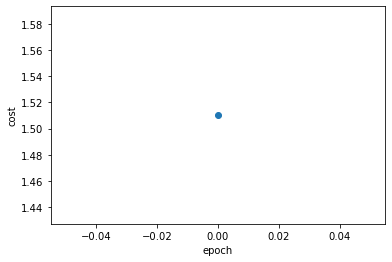

In [71]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.scatter(epoch_list,cost_list)

In [60]:
gradient_descent(X_train['area'],X_train['bedrooms'],y_train,100)

TypeError: gradient_descent() takes 3 positional arguments but 4 were given